# Python Capstone Project - XYZ_Corp Bank Lending

1. Loading & Understanding Dataset and target & predictor variables<br>
    a. Load required packages & libraries.<br>
    b. Load dataset.<br>
    c. Check dataset info -  head, tail, datatypes, dimensions etc...<br>
    d. Check for target variable class imbalance.<br>

a. Load Required packages & libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import sklearn
import warnings


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore", category=FutureWarning)

b. Loading dataset

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
bl = pd.read_table('/content/drive/MyDrive/Colab Notebooks/Capstone_Project_Imarticus/Python Project - Bank Lending/XYZCorp_LendingData.txt', low_memory=False)

#### c. Check dataset information - info, head, tail, dimensions etc..

In [27]:
bl.shape

(855969, 73)

In [28]:
bl.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [29]:
bl.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
855964,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,Office Assistant,8 years,RENT,31000.0,Verified,Jan-2015,n,NaN,debt_consolidation,Debt consolidation,905xx,CA,28.69,0.0,Sep-2004,0.0,NaN,77.0,9.0,1.0,14037.0,82.1,15.0,f,7055.47,7055.47,3971.88,3971.88,2944.53,1027.35,0.0,0.0,0.0,Jan-2016,332.10,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,25274.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN,0
855965,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,Director of Maintenance,10+ years,MORTGAGE,79000.0,Verified,Jan-2015,n,NaN,home_improvement,Home improvement,072xx,NJ,3.90,0.0,Mar-1974,1.0,26.0,NaN,5.0,0.0,8621.0,84.5,23.0,f,16933.26,16933.26,9532.39,9532.39,7066.74,2465.65,0.0,0.0,0.0,Jan-2016,797.03,Feb-2016,Jan-2016,0.0,29.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,140285.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,0
855966,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,Radiologist Technologist,5 years,RENT,35000.0,Verified,Jan-2015,n,NaN,debt_consolidation,Debt consolidation,378xx,TN,30.90,0.0,Sep-2003,0.0,NaN,84.0,9.0,1.0,11031.0,61.3,22.0,w,11155.50,11155.50,3769.74,3769.74,1844.50,1925.24,0.0,0.0,0.0,Jan-2016,316.07,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,34178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN,0
855967,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,Painter,1 year,RENT,64400.0,Source Verified,Jan-2015,n,NaN,debt_consolidation,Debt consolidation,010xx,MA,27.19,1.0,Oct-2003,2.0,22.0,NaN,17.0,0.0,8254.0,30.6,20.0,w,10447.31,10447.31,3787.67,3787.67,1552.69,2234.98,0.0,0.0,0.0,Jan-2016,317.86,Feb-2016,Jan-2016,1.0,22.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,58418.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN,0
855968,36271262,38982659,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,B5,Manager Hotel Operations Oasis,10+ years,RENT,100000.0,Verified,Jan-2015,n,NaN,credit_card,Credit card refinancing,331xx,FL,10.83,0.0,Dec-2001,1.0,NaN,110.0,8.0,1.0,33266.0,79.8,10.0,f,14110.94,14110.94,7943.76,7943.76,5889.06,2054.70,0.0,0.0,0.0,Jan-2016,664.20,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,33307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN,0


In [30]:
bl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  float64
 3   funded_amnt                  855969 non-null  float64
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [31]:
bl.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,416157.000000,131184.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855913.000000,213139.000000,855969.0,442.000000,440.000000,855969.000000,7.886560e+05,7.886560e+05,13288.000000,13288.000000,13288.000000,13288.000000,12934.000000,13288.000000,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,34.149943,70.463959,11.542447,0.194537,1.691053e+04,55.019405,25.269269,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,0.014230,44.101450,1.0,107412.163982,18.318477,0.004944,2.254129e+02,1.397662e+05,1.072998,2.945665,0.749323,1.666767,20.833153,36511.541391,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,21.868500,27.827120,5.308094,0.581585,2.222374e+04,23.811585,11.818841,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.133712,22.164907,0.0,47987.608637,7.221855,0.077333,1.048945e+04,1.539385e+05,1.206939,3.080330,0.986169,1.685394,26.739237,42492.757796,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.050000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,0.000000,27.000000,1.0,75000.250000,13.187500,0.000000,0.000000e+00,2.987000e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10390.250000,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.190300e+04,55.900000,24.000000,6290.250000,6287.650000,4976.160000,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,0.000000,44.000000,1.0,100000.000000,17.735000,0.000000,0.000000e+00,8.100850e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24959.500000,75.000000,1.0

In [32]:
bl.describe(include = ['O'])  # summary of categorical variables

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint
count,855969,855969,855969,806526,812908,855969,855969,855969,855969,121812,855969,855936,855969,855969,855969,855969,847107,602998,855919,855969,442
unique,2,7,35,290912,11,6,3,103,2,120335,14,60991,931,51,697,2,97,3,102,2,3
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,Oct-2015,n,,debt_consolidation,Debt consolidation,945xx,CA,Aug-2001,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL,Not Verified
freq,600221,247998,54958,12965,282090,429106,318178,48212,855964,231,505392,398089,9466,125172,6433,442555,467510,534094,701687,855527,252


#### d. Check target variable - type, distribution, class imbalance etc....
Target variable is 'default_ind' - which is Loan defaulting indicator, here value 0 mean - will not default on loan and value - 1 means may default on loan.

0    809502
1     46467
Name: default_ind, dtype: int64


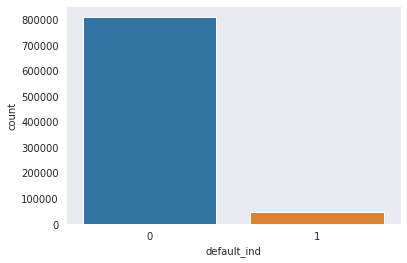

In [33]:
print(bl.default_ind.value_counts())
sns.countplot('default_ind',data=bl) 
# We can see heavy class imbalance here, which we will have to deal with later, during model building 

#### Data Analysis: 
a.   Find out missing values.<br>
b.   Understand all categorical variables, their credibility and levels.<br>
c.   Understand all numerical variabels & their distribution.<br>
d.   Find out outliers in data.<br>
e.   Explporatory data analysis - Understand relationships between predictor variables & target variables, also find insights about target variable from data


a. Find out missing values in data

In [34]:
bl_null = pd.DataFrame({'Features': [var for var in bl.columns if bl[var].isnull().sum() > 1], 
                        'Null Values' : [bl[var].isnull().sum() for var in bl.columns if bl[var].isnull().sum() > 1],
                        '% missing' : [bl[var].isnull().sum() / bl.shape[0] *100 for var in bl.columns if bl[var].isnull().sum() > 1 ] })
bl_null.sort_values(by=['% missing'], ascending=False, ignore_index=True)

,Features,Null Values,% missing
0,dti_joint,855529,99.948596
1,annual_inc_joint,855527,99.948363
2,verification_status_joint,855527,99.948363
3,il_util,844360,98.643759
4,mths_since_rcnt_il,843035,98.488964
5,inq_last_12m,842681,98.447607
6,open_il_24m,842681,98.447607
7,open_il_12m,842681,98.447607
8,open_il_6m,842681,98.447607
9,open_acc_6m,842681,98.447607


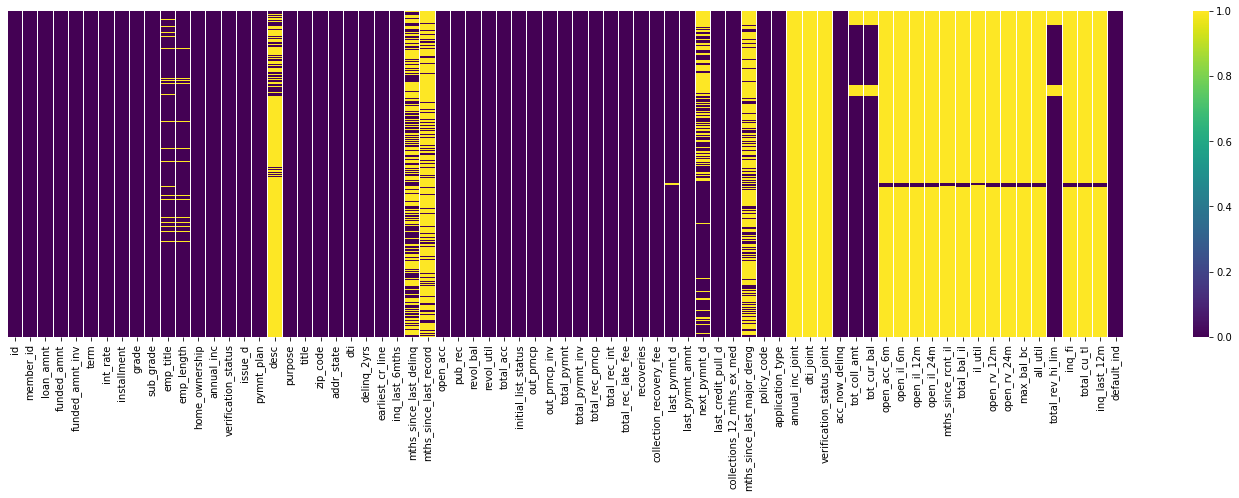

In [ ]:
# Visualize missing data
plt.figure(figsize=(25,6))
sns.heatmap(bl.isnull(),yticklabels=False,cmap="viridis")
plt.show()

1. We have 32 columns with missing values.
2. 21 columns are where missing value are more than 50%. Keeping these columns will not serve any purpose for our model
3. We will impute values accordingly for columns with missing values more than 30% 

In [35]:
# Let's drop columns where Null values are more than 30% of total values in columns
bl.dropna('columns', 'any', thresh=(0.70*len(bl)), inplace=True )
print(bl.shape)

(855969, 52)


In [36]:
# Dropping some more unnecessary columns like idenfiers & description columns
# we dropping description columns since these description are provided by borrower, which are not an indicator whether borrower will default on loans or not
bl.drop(['id','member_id','emp_title','zip_code','policy_code','title'],axis=1, inplace=True)
bl.shape

(855969, 46)

b. Understand Categorical Data

In [37]:
cat_features = bl.select_dtypes(include='object')     # Selecting only categorical features
print(cat_features.shape)
cat_features.info()

(855969, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 855969 non-null  object
 1   grade                855969 non-null  object
 2   sub_grade            855969 non-null  object
 3   emp_length           812908 non-null  object
 4   home_ownership       855969 non-null  object
 5   verification_status  855969 non-null  object
 6   issue_d              855969 non-null  object
 7   pymnt_plan           855969 non-null  object
 8   purpose              855969 non-null  object
 9   addr_state           855969 non-null  object
 10  earliest_cr_line     855969 non-null  object
 11  initial_list_status  855969 non-null  object
 12  last_pymnt_d         847107 non-null  object
 13  next_pymnt_d         602998 non-null  object
 14  last_credit_pull_d   855919 non-null  object
 15  application_type     

In [38]:
cat_features.describe()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,855969,855969,855969,812908,855969,855969,855969,855969,855969,855969,855969,855969,847107,602998,855919,855969
unique,2,7,35,11,6,3,103,2,14,51,697,2,97,3,102,2
top,36 months,B,B3,10+ years,MORTGAGE,Source Verified,Oct-2015,n,debt_consolidation,CA,Aug-2001,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL
freq,600221,247998,54958,282090,429106,318178,48212,855964,505392,125172,6433,442555,467510,534094,701687,855527




*   There are 16 categorical columns in dataset, out of which 5 are dates.
*   Subgrade, Address state, Purpose have lot of levels (> 13) which need to dealt with proper encoding method.
*   One hot & label encoding methods to be used for categorical variables.
*   There 5 date variables namely - issue_d, earliest_cr_line, last_pymnt_date, next_pymnt, last_credit_pull_d. from these necessary variables shouldbe converted to datetime & seperated with month& year, rest should be deleted.
*   pymnt_plan has only 5 values for level 'n', hence we'll delete that column



In [39]:
del bl['pymnt_plan']

c. Understanding Numerical Data

In [40]:
num_features = bl.select_dtypes(include= ['float64', 'int64'])
print(num_features.shape)
num_features.info()

(855969, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   855969 non-null  float64
 1   funded_amnt                 855969 non-null  float64
 2   funded_amnt_inv             855969 non-null  float64
 3   int_rate                    855969 non-null  float64
 4   installment                 855969 non-null  float64
 5   annual_inc                  855969 non-null  float64
 6   dti                         855969 non-null  float64
 7   delinq_2yrs                 855969 non-null  float64
 8   inq_last_6mths              855969 non-null  float64
 9   open_acc                    855969 non-null  float64
 10  pub_rec                     855969 non-null  float64
 11  revol_bal                   855969 non-null  float64
 12  revol_util                  855523 non-null  float64
 13  t

In [41]:
num_features.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
count,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855913.000000,855969.000000,7.886560e+05,7.886560e+05,7.886560e+05,855969.000000
mean,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,11.542447,0.194537,1.691053e+04,55.019405,25.269269,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,0.014230,0.004944,2.254129e+02,1.397662e+05,3.216357e+04,0.054286
std,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,5.308094,0.581585,2.222374e+04,23.811585,11.818841,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.133712,0.077333,1.048945e+04,1.539385e+05,3.769964e+04,0.226581
min,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,0.000000,0.000000,0.000000e+00,2.987000e+04,1.400000e+04,0.000000
50%,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,11.000000,0.000000,1.190300e+04,55.900000,24.000000,6290.250000,6287.650000,4976.160000,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,0.000000,0.000000,0.000000e+00,8.100850e+04,2.380000e+04,0.000000
75%,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,1.000000,14.000000,0.000000,2.085700e+04,73.500000,32.000000,13528.800000,13522.510000,10744.803649,10697.33000,8000.000000,2233.980000,0.000000,0.000000,0.000000,849.160000,0.000000,0.000000,0.000000e+00,2.087032e+05,3.990000e+04,0.000000
max,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,8.000000,90.000000,86.000000,2.904836e+06,892.300000,169.000000,49372.860000,49372.860000,57777.579870,57777.58000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36475.590000,20.000000,14.000000,9.152545e+06,8.000078e+06,9.999999e+06,1.000000


*   Huge difference can be seen in 75% value & maximum value for almost all variables, which suggests presence of outliers.


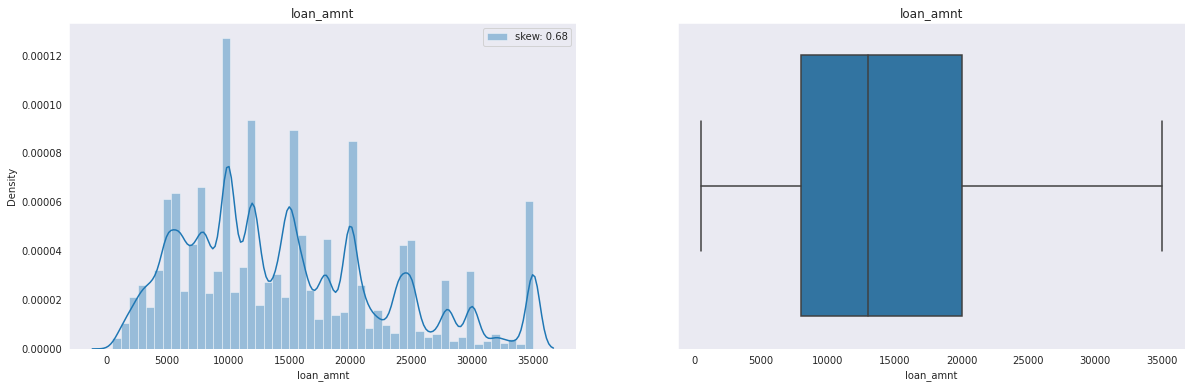

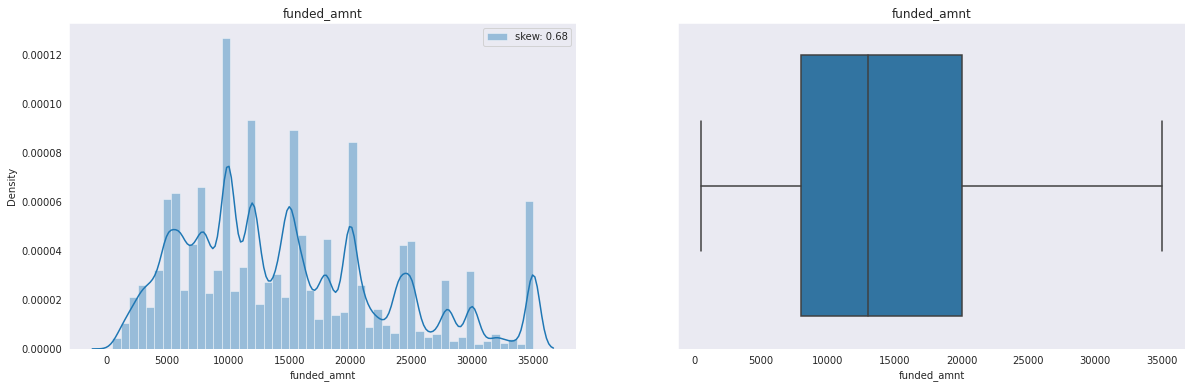

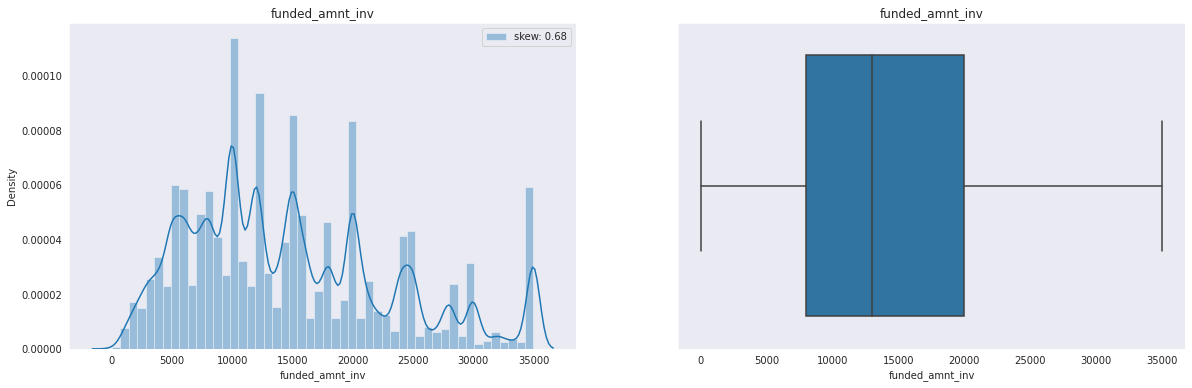

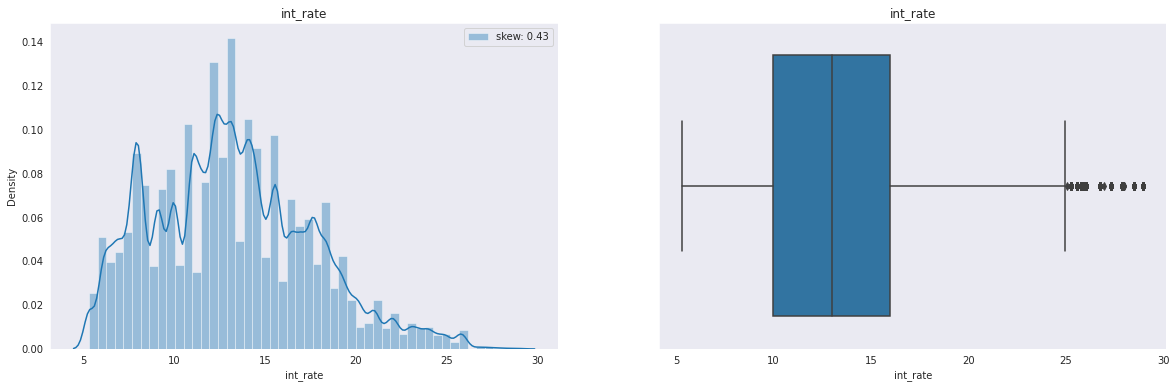

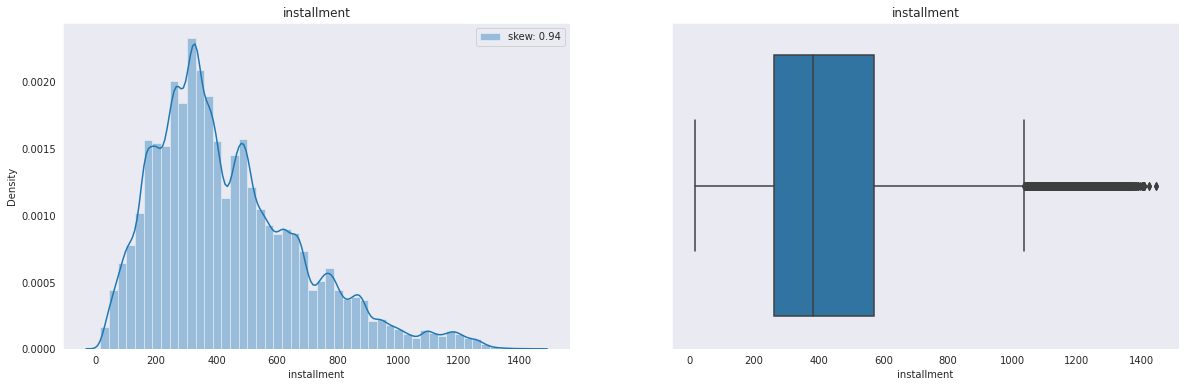

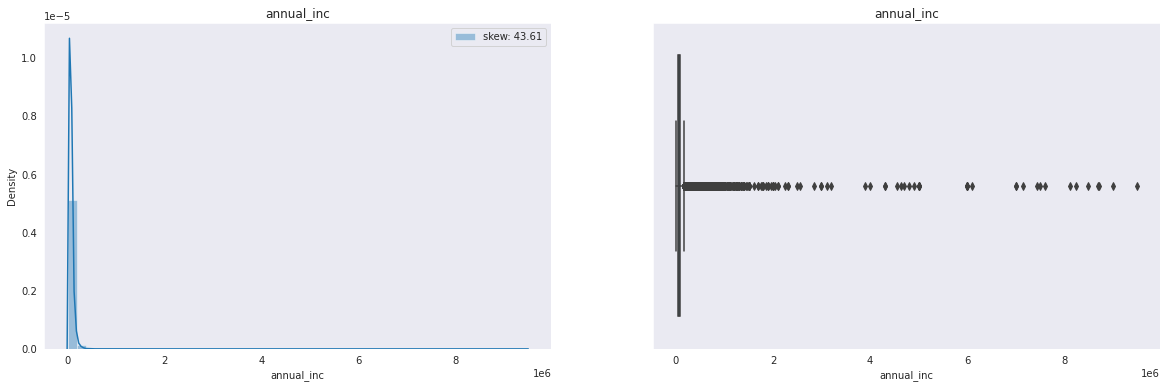

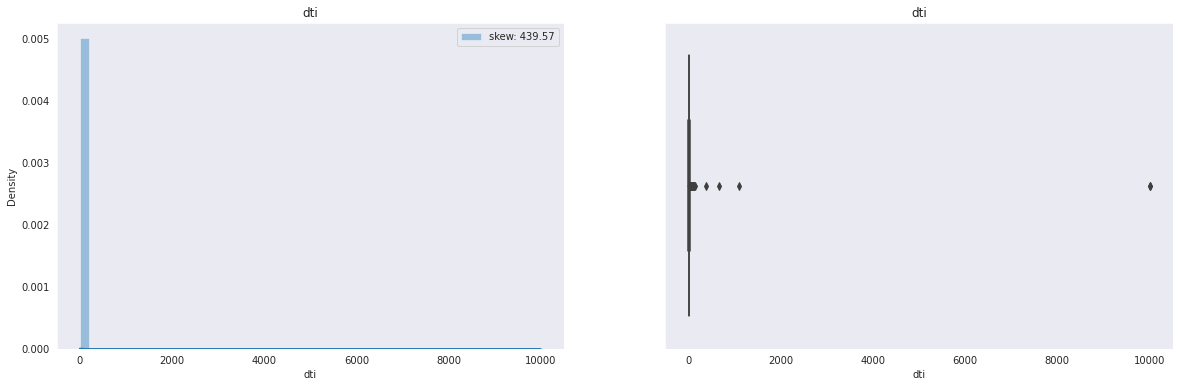

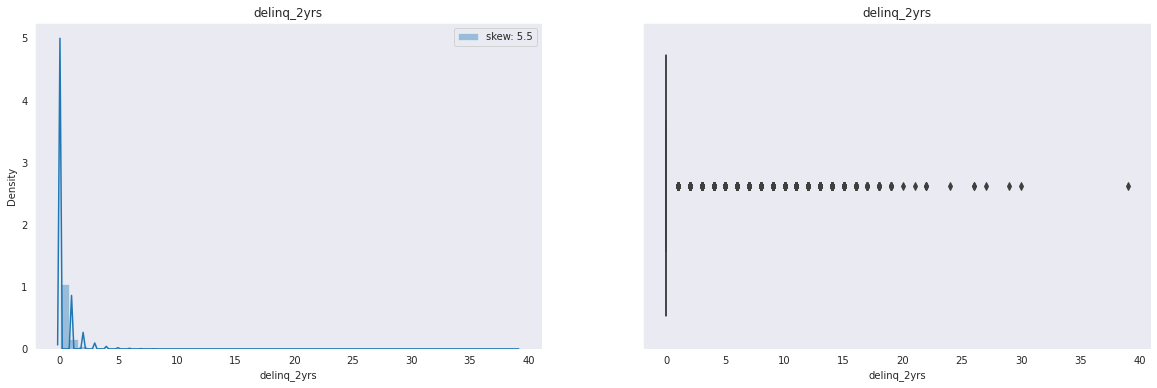

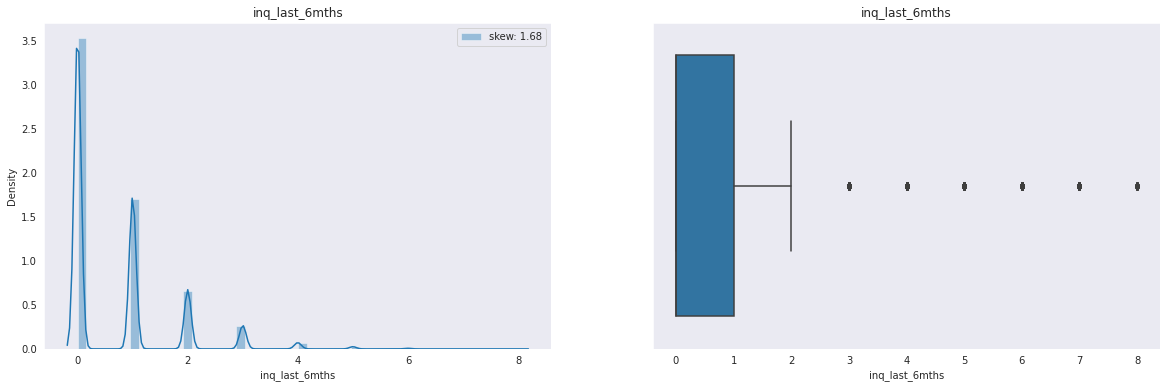

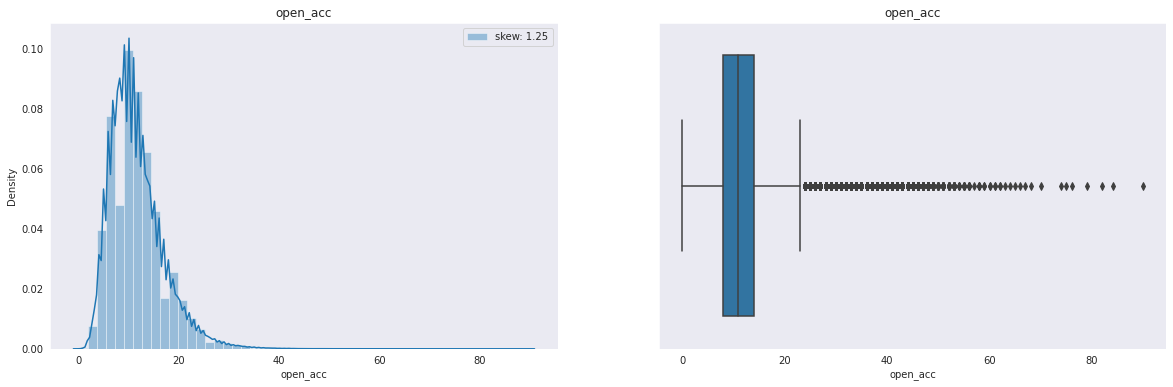

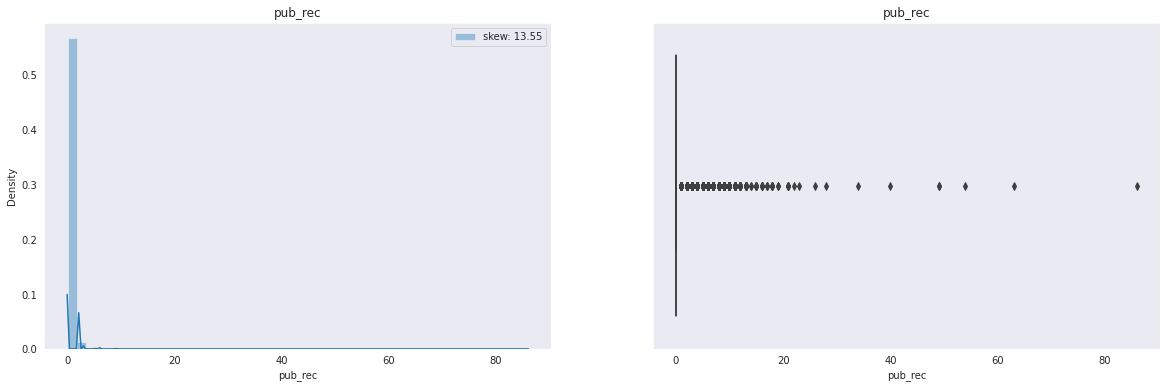

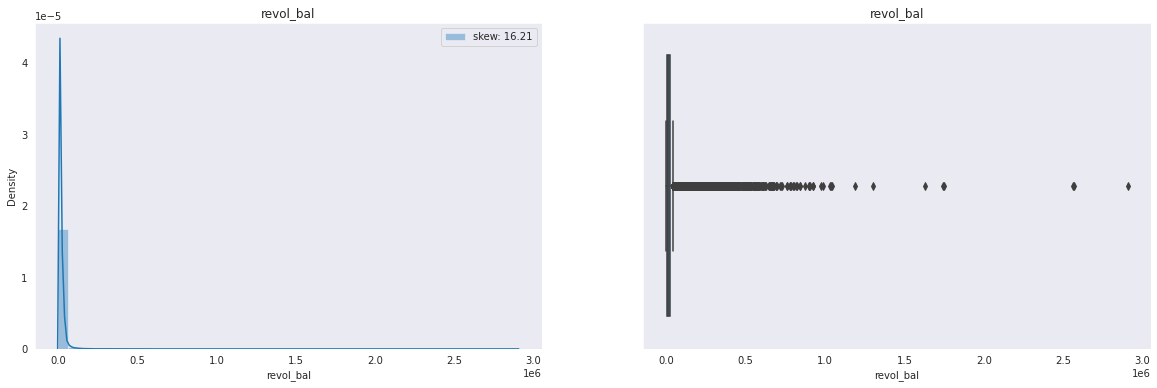

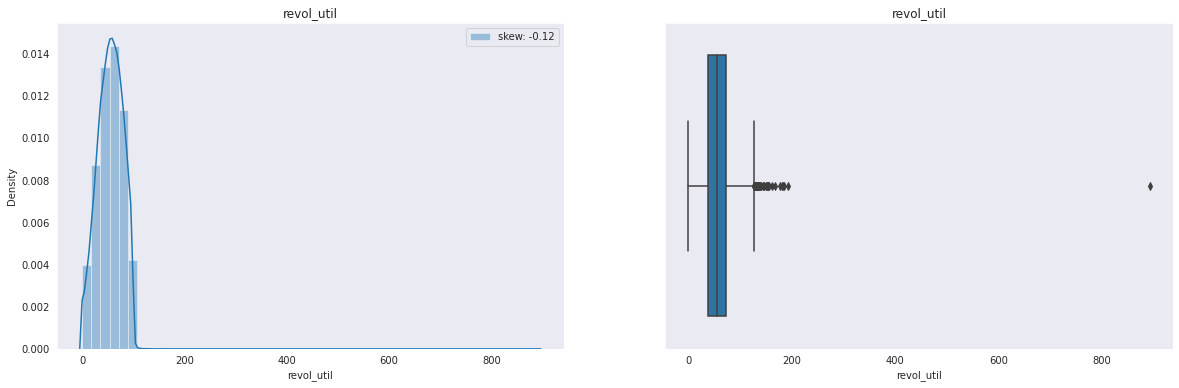

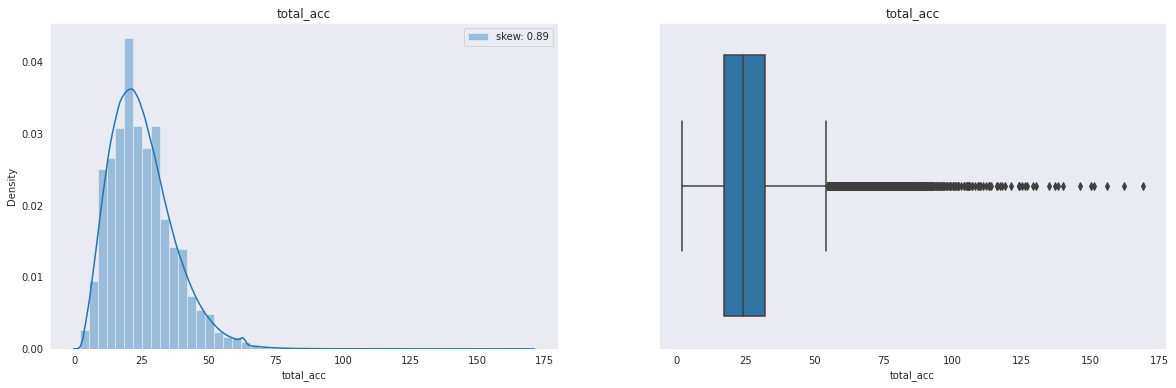

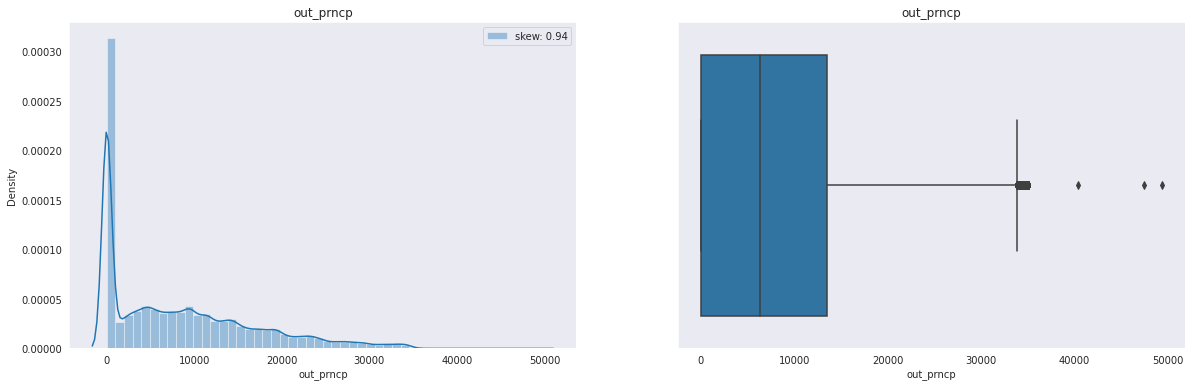

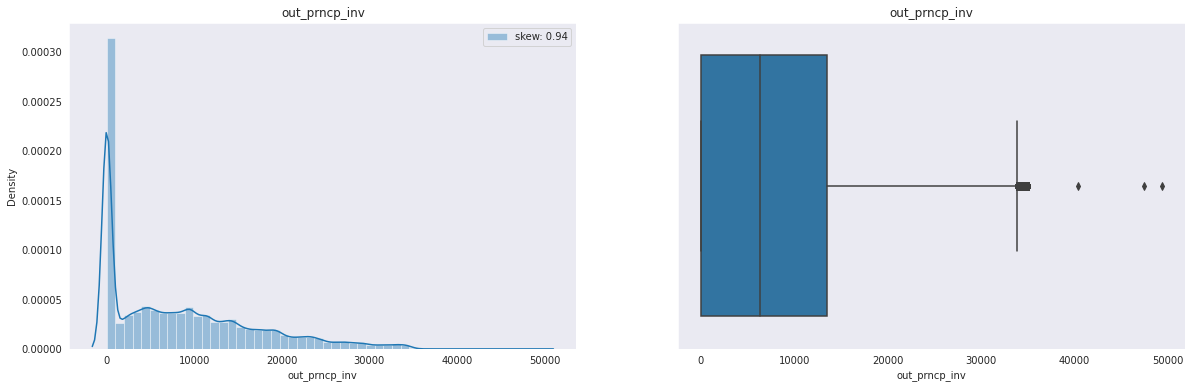

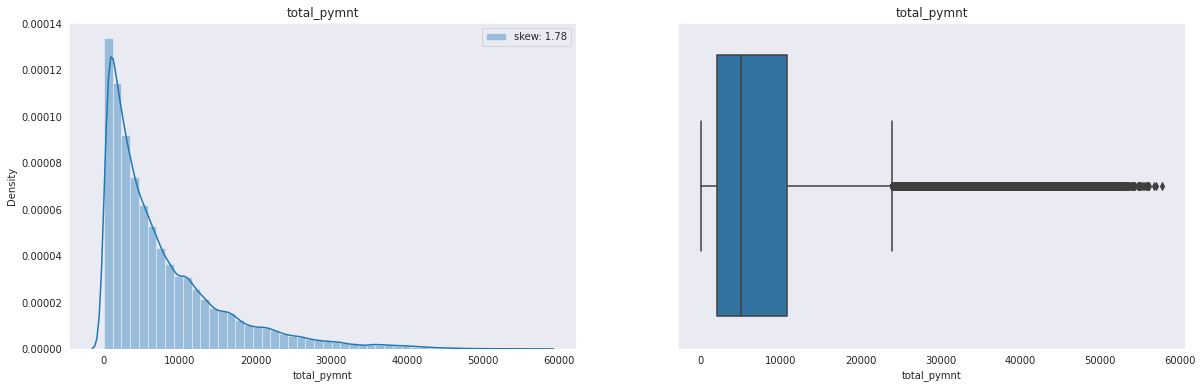

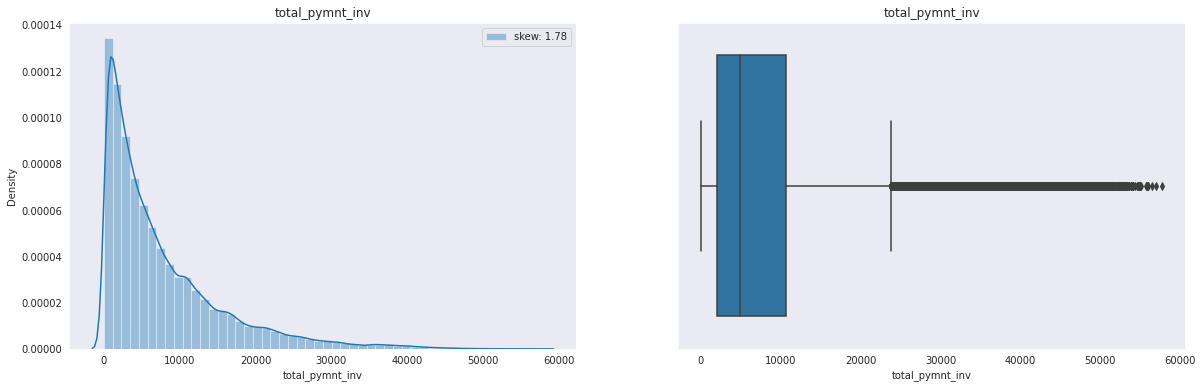

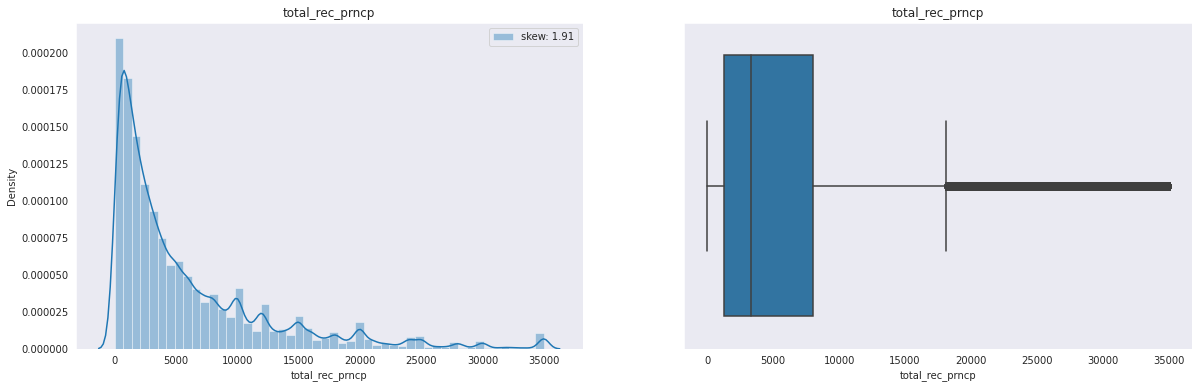

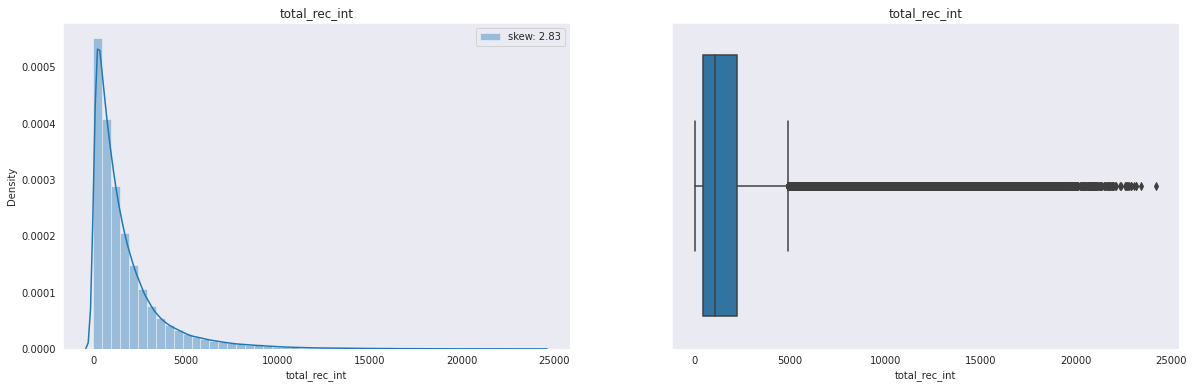

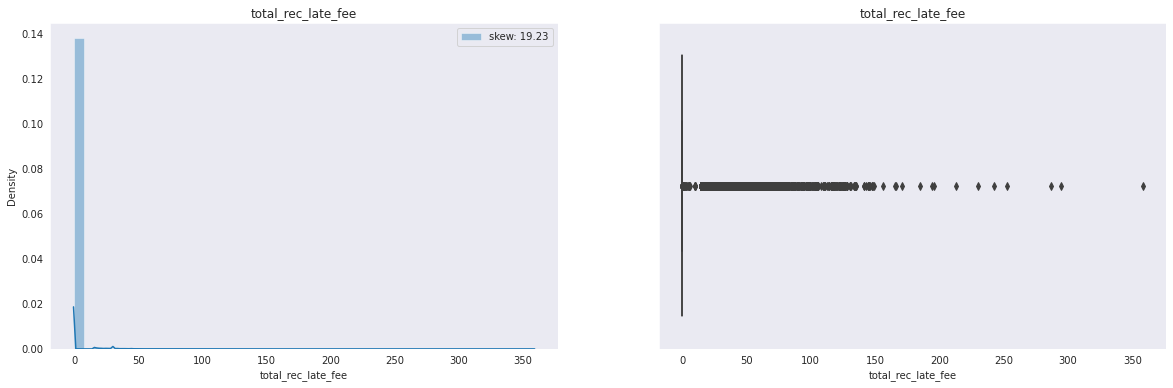

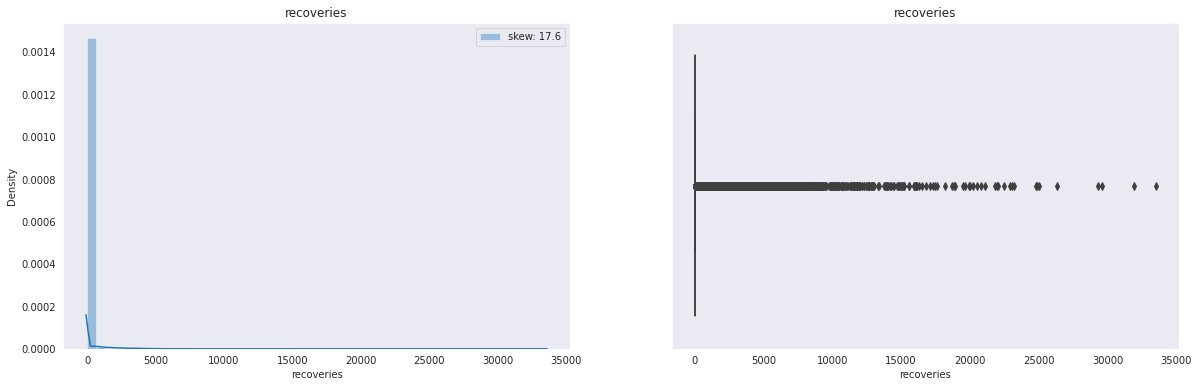

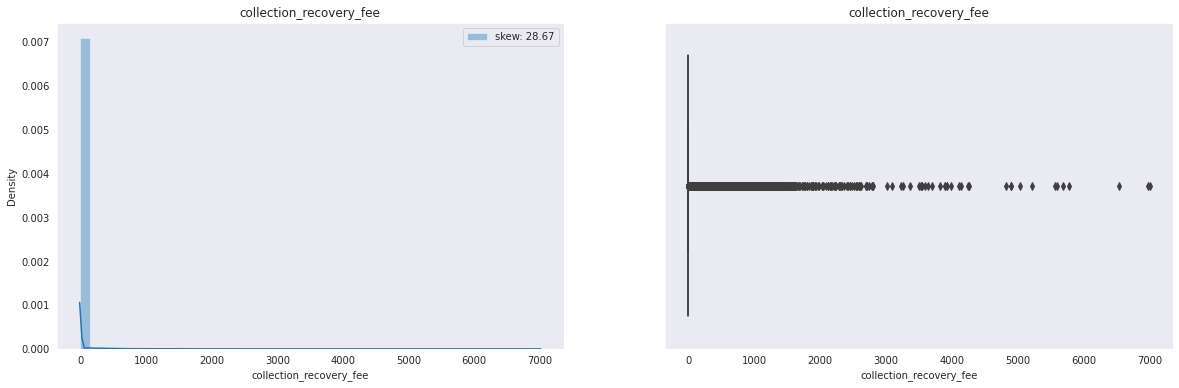

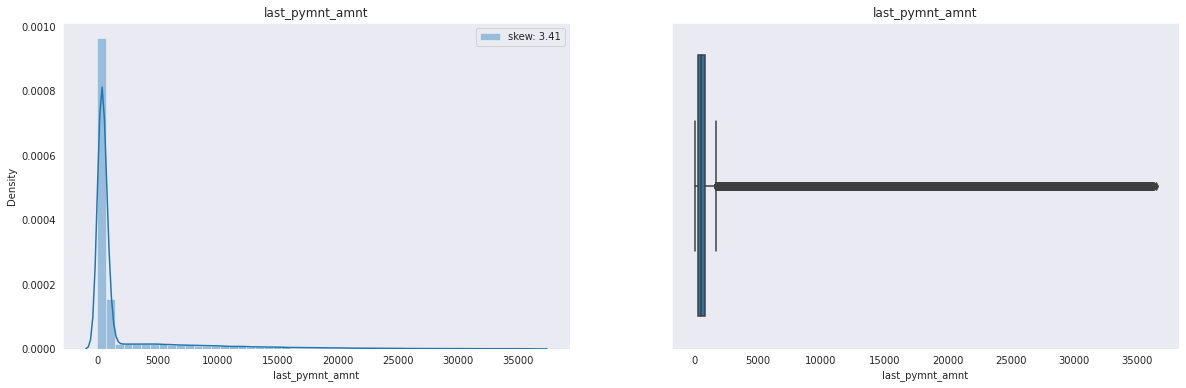

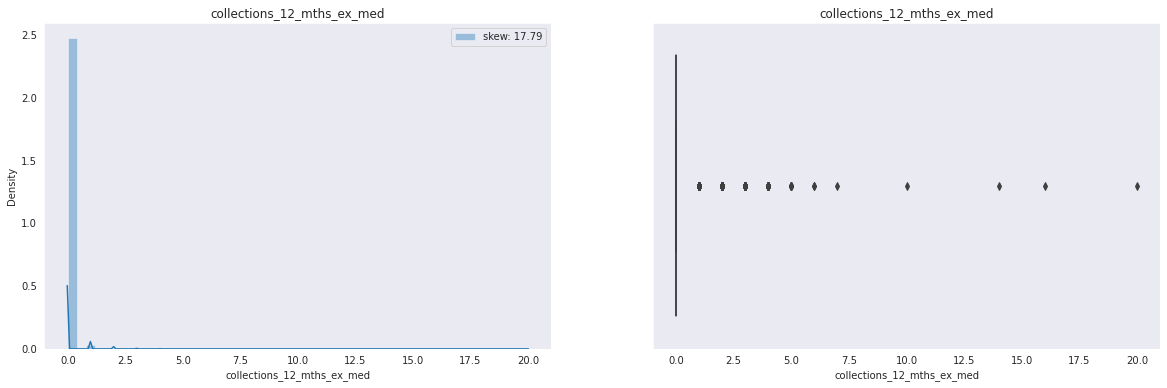

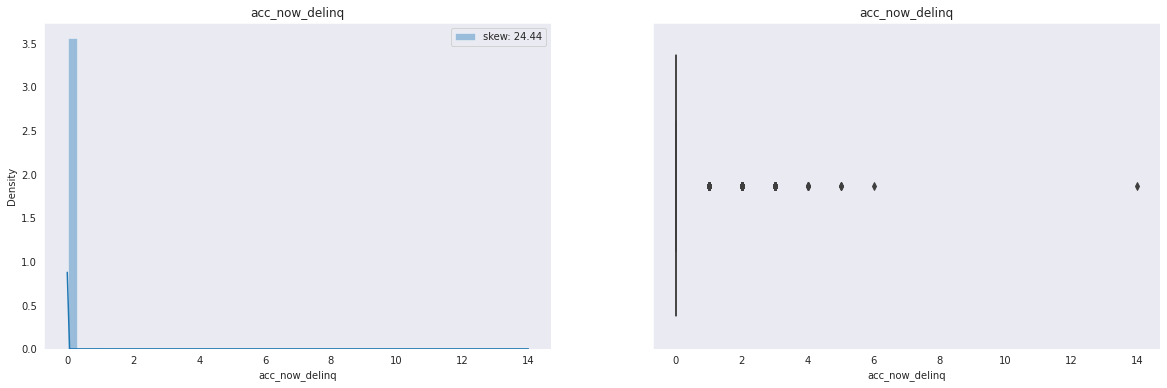

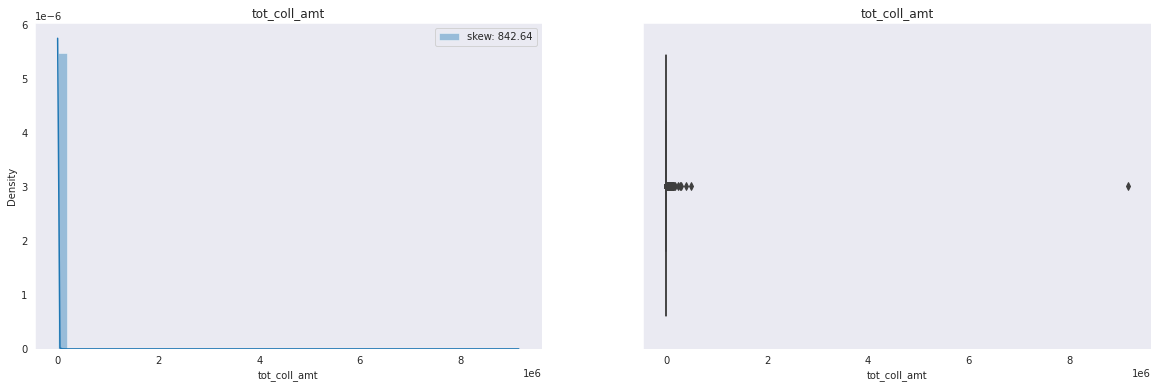

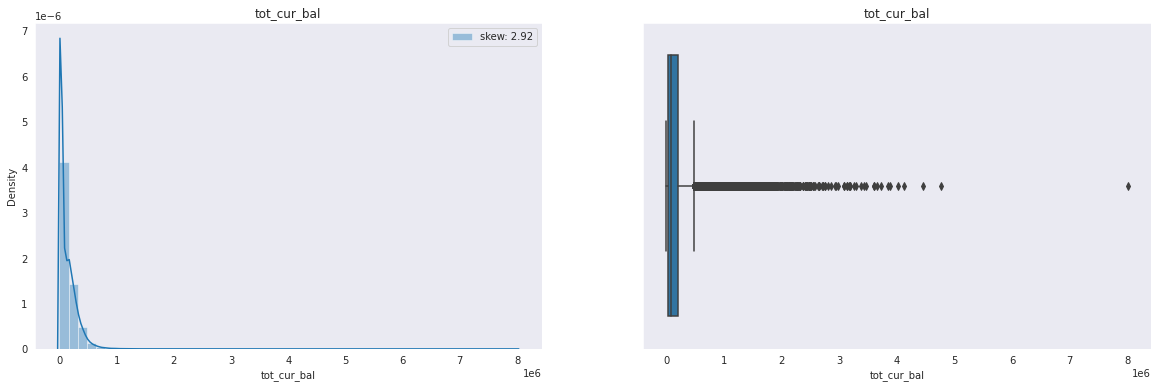

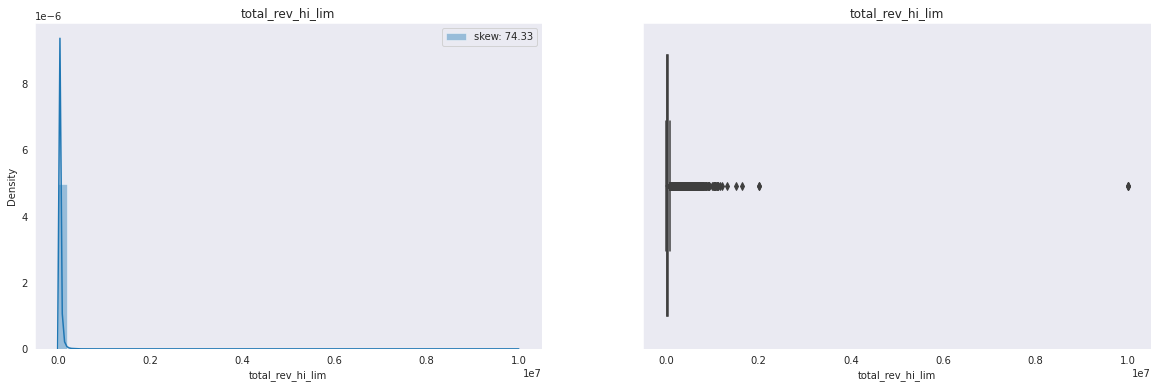

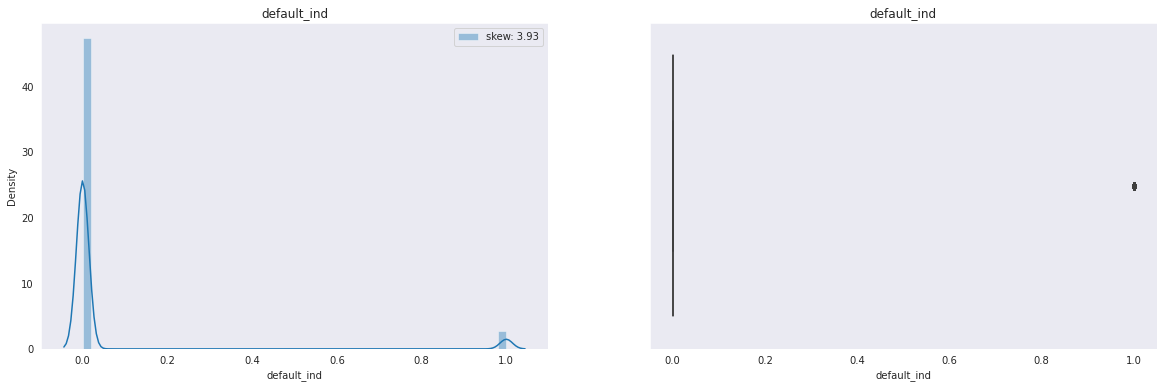

In [ ]:
# Checking outliers of continuous_feature for that use the distplot and box plot 

sns.set_style('dark')

for feature in num_features:
    
    plt.figure(figsize=(20,6))
    plt.subplot(121)       # 1 = no. of rows, 2 = no. of cols, 1 = position of the this graph you want to plot
    sns.distplot(bl[feature], label="skew: " + str(np.round(bl[feature].skew(),2)))
    plt.title(feature)
    plt.legend()
    
    plt.subplot(122)        # 1 = no. of rows, 2 = no. of cols, 2 = position of the this graph you want to plot
    sns.boxplot(bl[feature])
    plt.title(feature)
    plt.show()

####**e. Explporatory data analysis** - 

Understand relationships between predictor variables & target variables, also find insights about target variable from data

In [42]:
eda = bl.copy()  # copying dataset eda for exploratory data analysis

In [43]:
# Converting issue_d into datetime format
eda['issue_d'] = pd.to_datetime(eda['issue_d'], infer_datetime_format=True)

In [44]:
eda['year'] = eda['issue_d'].dt.year   # extracting year for issue_d

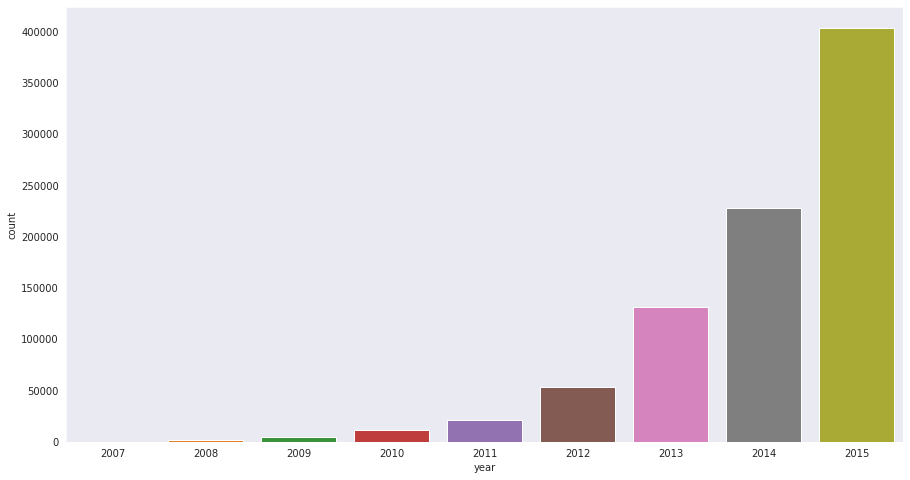

In [45]:
plt.figure(figsize=(15,8))
sns.countplot(x='year', data=eda)

1. Here we can see exponential rise in issuing loans from 2007 to 2015. we can say every year the banking sector going towards the more loan distribution for their business.

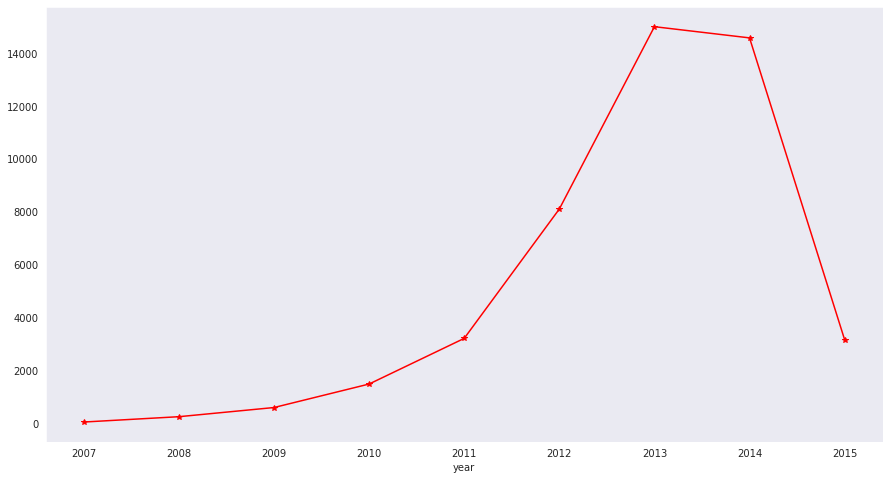

In [46]:
a = eda['default_ind'].groupby(by=eda['year']).sum()
a.plot(marker='*', figsize=(15,8), color='red')

Here we can see from 2007 to 2013 exponential rise in the defaulters because the from 2007 banks are looking for increase the business every year hence, they are going toward the more loan distribution also at that time the banking sectors busines are not digitalized so they were weak at the verification department because of that  the defaulters are increased till 2013 after 2013 based on the previous data or the history of the costumers which is updated in the systems they are able to check the credibility of the customers faster & in more efficient ways which then reduced number of defaulters drastically.
So thanks to AI-ML technology to make the faster loan approval system.


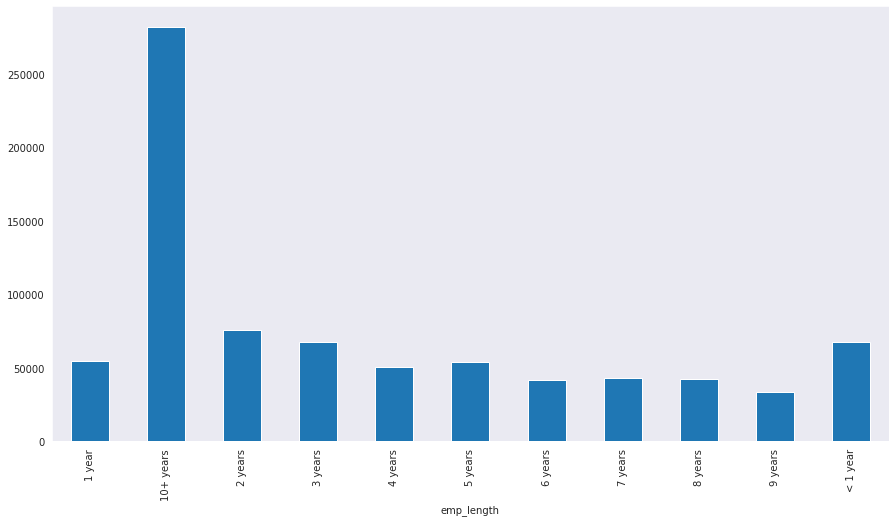

In [47]:
b = eda['year'].groupby(by=eda['emp_length']).count()
b.plot(figsize=(15,8), kind='bar')

Here we can see that most number loans issued were issued to people having 10+ years of experience. 


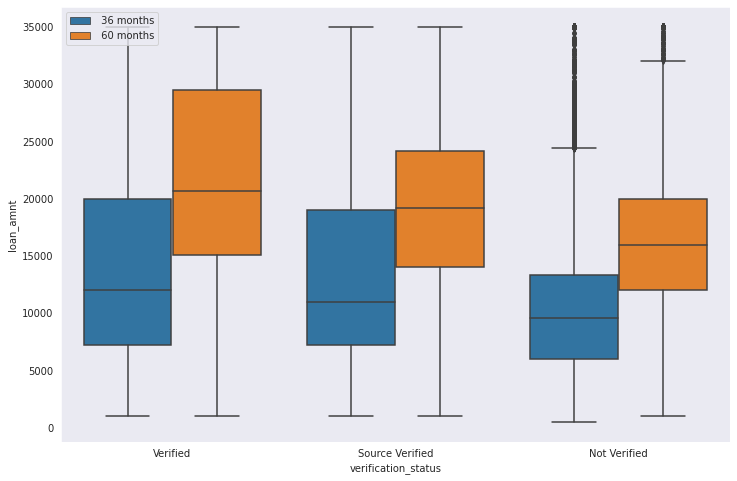

In [48]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='verification_status', y='loan_amnt', data=eda, hue='term')
plt.legend(loc='upper left')

1. Here we can see that in the verified boxplot the loan amount is high  for  the 60 months term i.e. around 20000  and the loan amount for 36 months is less I.e. around 12000 
2. In the source verified boxplot the loan amount is high  for  the 60 months term i.e. around 20000  and the loan amount for 36 months is less I.e. around 12000 
3. In the not verified boxplot the loan amount is high  for  the 60 months term i.e. around 15000  and the loan amount for 36 months is less I.e. around 10000 
from box plot we can say the  loan amount is less when this is not verified across both loan terms.


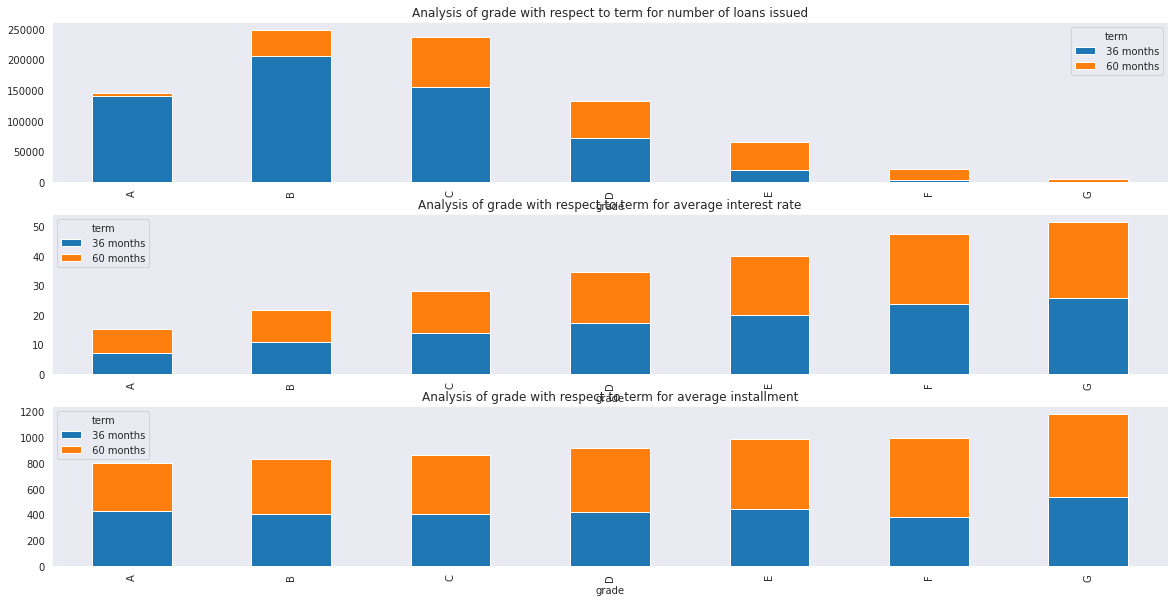

In [49]:
c = pd.crosstab(index=eda.grade, columns=eda.term, values=eda.year, aggfunc='count')
d = pd.crosstab(index=eda.grade, columns=eda.term, values=eda.int_rate, aggfunc='mean')
e = pd.crosstab(index=eda.grade, columns=eda.term, values=eda.installment, aggfunc='mean')

#plt.figure(figsize=(25,6))
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(20,10))
c.plot.bar(stacked=True, ax=ax1)
ax1.title.set_text('Analysis of grade with respect to term for number of loans issued')

d.plot.bar(stacked=True, ax=ax2)
ax2.title.set_text('Analysis of grade with respect to term for average interest rate')

e.plot.bar(stacked=True, ax=ax3)
ax3.title.set_text('Analysis of grade with respect to term for average installment')

1. Here we have generated the analysis of the grade with respect to the term for no of loan issued average interest rate and average installment rate 
2. In first at the top we have the plot of grade vs total loans issued, At a middle  average int rate vs grade, At bottom average installment vs grade 
3. In top plot for grade A more loans are issued for the 36 months period  i.e. 96.51 % because for grade a the interest rate is very less an also the installment is less see in the other two plots 
4. From grade D to G in first plot we can see the loan issuing count decreasing for both terms 60 and 36 months because since interest rates increase avg installment for both the terms also increases.


Text(0.5, 1.0, 'Home ownership wise % of loan defaulters')

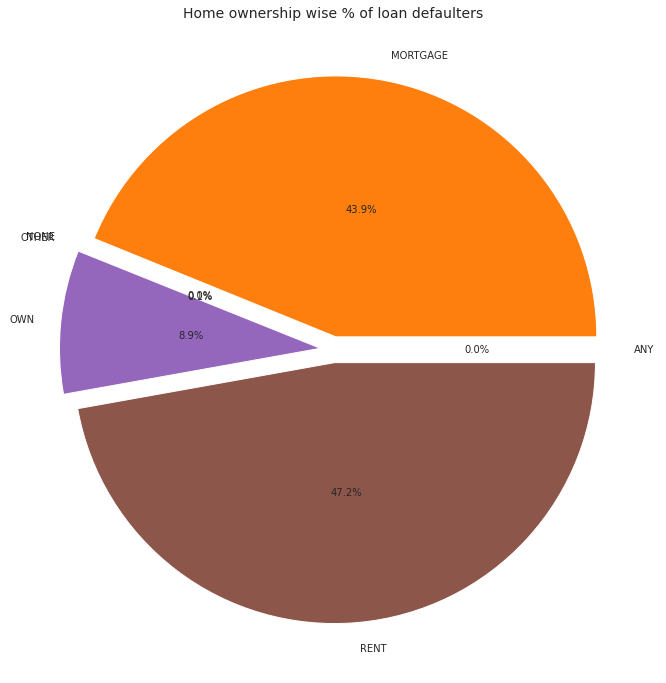

In [50]:
#Using matplotlib
f = bl.groupby(['home_ownership'])['default_ind'].sum()
pie, ax1 = plt.subplots(1, 1, figsize=(12,12))
labels = f.keys()
plt.pie(x=f, autopct="%.1f%%", explode=[0.05]*6, labels=labels, pctdistance=0.5)
plt.title("Home ownership wise % of loan defaulters", fontsize=14)

From the plot, we can say that the chances of defaulter is more i.e. 47.21 % and 43.88 % respectively but the person who is not living on rental basis and who is having his/her own living property the defaulter chances is less obliviously the person who  has own property for the living their monthly expenses is less than other to class 

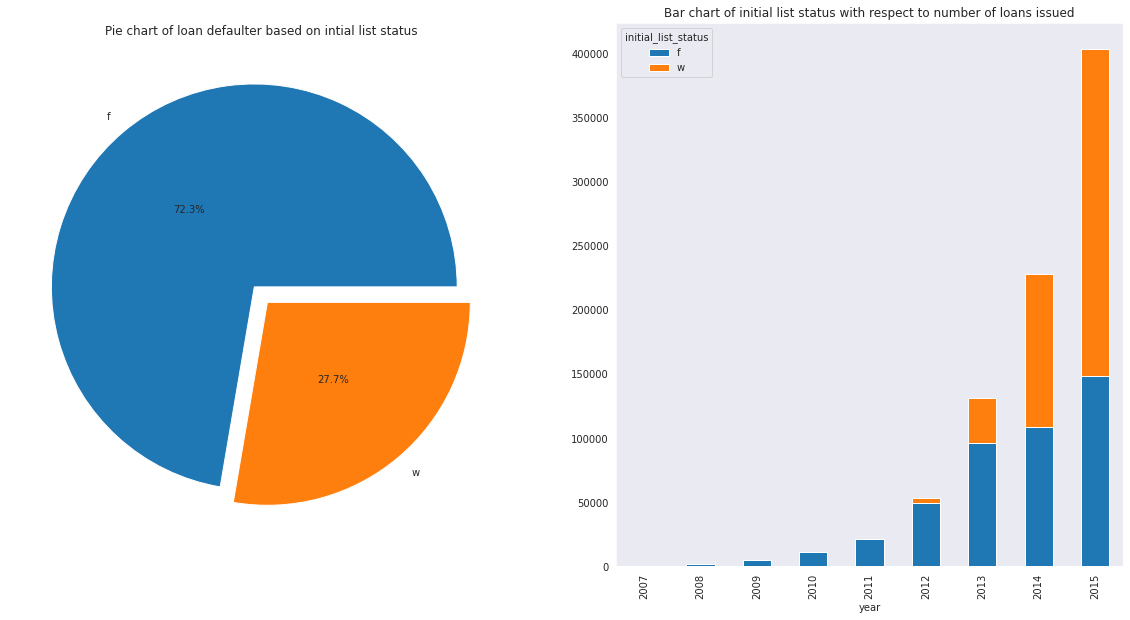

In [51]:
#Using matplotlib
f = bl.groupby(['initial_list_status'])['default_ind'].sum()
g = pd.crosstab(index=eda.year, columns=eda.initial_list_status)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
ax1.pie(x=f, autopct="%.1f%%", explode=[0.05]*2, labels=f.keys(), pctdistance=0.5)
ax1.title.set_text("Pie chart of loan defaulter based on intial list status")

g.plot.bar(stacked=True, ax=ax2)
ax2.title.set_text("Bar chart of initial list status with respect to number of loans issued")
plt.show()

1. In pie chart we have the initial listing status of the loan whole and fractional here the customer who has own property the defaulting chances of whole loan is 27.69 % and fractional loan is 72.31% 
2. In bar chart we can understand why ‘w’ listed loans have less defaulters since these loans were issued from 2012, but have gained high issuing momentum is last 2 years.


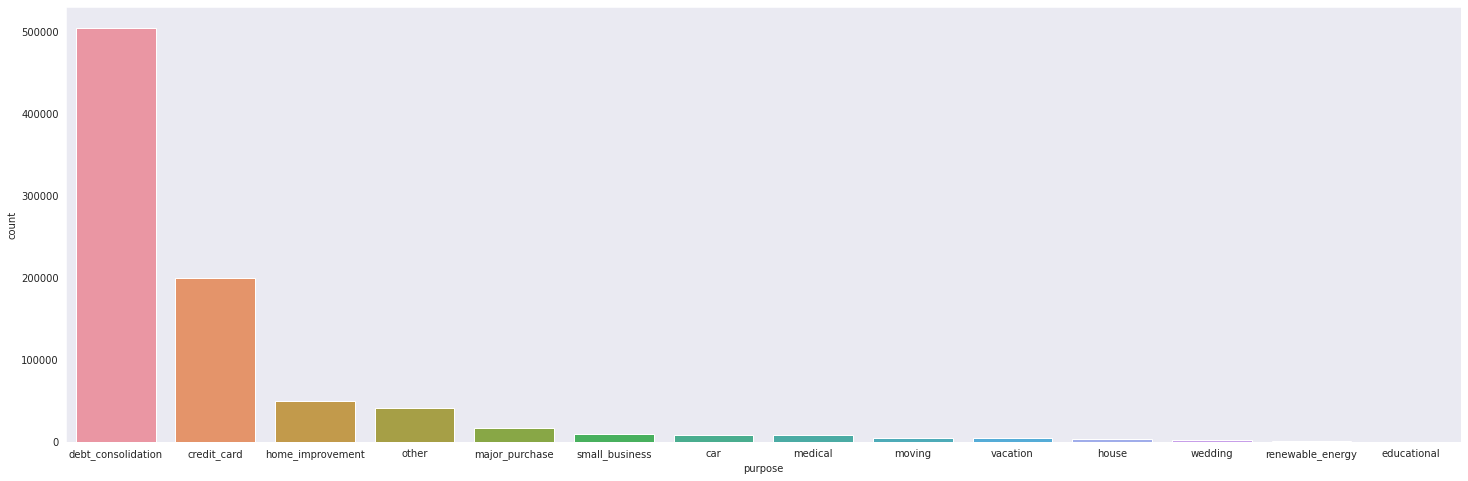

In [52]:
plt.figure(figsize=(25,8))
sns.countplot(eda.purpose, order = eda['purpose'].value_counts().index)

1. Here we can see that maximum loans are disbursed for the debt consolidation purpose, that means, customer uses for clearing their small loans or fulfill their multiple needs and create one loan instead of multiple loans they adopt this way. 
2. After the debt consolidation second highest count of purpose is the credit card loans which Is 23.38% mostly loan is disbursed for only for debt consolidation and credit card purpose.


#### 3. Feature Engineering:
a.   Missing Value Imputation<br>
b.   Categorical variables encoding<br>

a. Missing Values Imputation

In [53]:
bl_null = pd.DataFrame({'Features': [var for var in bl.columns if bl[var].isnull().sum() > 1], 
                        'Null Values' : [bl[var].isnull().sum() for var in bl.columns if bl[var].isnull().sum() > 1],
                        '% missing' : [bl[var].isnull().sum() / bl.shape[0] *100 for var in bl.columns if bl[var].isnull().sum() > 1 ] })
bl_null.sort_values(by=['% missing'], ascending=False, ignore_index=True)

,Features,Null Values,% missing
0,next_pymnt_d,252971,29.553757
1,tot_coll_amt,67313,7.863953
2,tot_cur_bal,67313,7.863953
3,total_rev_hi_lim,67313,7.863953
4,emp_length,43061,5.030673
5,last_pymnt_d,8862,1.035318
6,revol_util,446,0.052105
7,collections_12_mths_ex_med,56,0.006542
8,last_credit_pull_d,50,0.005841


In [54]:
bl[['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length', 'last_pymnt_d', 'revol_util', 'collections_12_mths_ex_med', 'last_credit_pull_d']].describe(include='all')

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,emp_length,last_pymnt_d,revol_util,collections_12_mths_ex_med,last_credit_pull_d
count,7.886560e+05,7.886560e+05,7.886560e+05,812908,847107,855523.000000,855913.000000,855919
unique,NaN,NaN,NaN,11,97,NaN,NaN,102
top,NaN,NaN,NaN,10+ years,Jan-2016,NaN,NaN,Jan-2016
freq,NaN,NaN,NaN,282090,467510,NaN,NaN,701687
mean,2.254129e+02,1.397662e+05,3.216357e+04,NaN,NaN,55.019405,0.014230,NaN
std,1.048945e+04,1.539385e+05,3.769964e+04,NaN,NaN,23.811585,0.133712,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000,0.000000,NaN
25%,0.000000e+00,2.987000e+04,1.400000e+04,NaN,NaN,37.600000,0.000000,NaN
50%,0.000000e+00,8.100850e+04,2.380000e+04,NaN,NaN,55.900000,0.000000,NaN
75%,0.000000e+00,2.087032e+05,3.990000e+04,NaN,NaN,73.500000,0.000000,NaN


In [55]:
# Dropping next payment date since it will not serve as a prominent indicator for loan defaulting
del bl['next_pymnt_d']
del bl['last_pymnt_d']
del bl['last_credit_pull_d']

In [56]:
# Imputing emp_length using mode imputation
bl['emp_length'] = bl.emp_length.fillna(value=(bl.emp_length.mode()[0]))

In [57]:
bl_null = pd.DataFrame({'Features': [var for var in bl.columns if bl[var].isnull().sum() > 1], 
                        'Null Values' : [bl[var].isnull().sum() for var in bl.columns if bl[var].isnull().sum() > 1],
                        '% missing' : [bl[var].isnull().sum() / bl.shape[0] *100 for var in bl.columns if bl[var].isnull().sum() > 1 ] })
bl_null.sort_values(by=['% missing'], ascending=False, ignore_index=True)

,Features,Null Values,% missing
0,tot_coll_amt,67313,7.863953
1,tot_cur_bal,67313,7.863953
2,total_rev_hi_lim,67313,7.863953
3,revol_util,446,0.052105
4,collections_12_mths_ex_med,56,0.006542


In [58]:
# Imputing null values with median
for var in bl_null.Features:
    bl[var] = bl[var].fillna(bl[var].median())

In [59]:
bl.isnull().sum().any()

False

b. Encoding Categorical Variables

In [60]:
cat_features = bl.select_dtypes(include=['O'])
cat_features.describe()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,purpose,addr_state,earliest_cr_line,initial_list_status,application_type
count,855969,855969,855969,855969,855969,855969,855969,855969,855969,855969,855969,855969
unique,2,7,35,11,6,3,103,14,51,697,2,2
top,36 months,B,B3,10+ years,MORTGAGE,Source Verified,Oct-2015,debt_consolidation,CA,Aug-2001,f,INDIVIDUAL
freq,600221,247998,54958,325151,429106,318178,48212,505392,125172,6433,442555,855527


In [61]:
# Label encoding categorical variables

In [62]:
# Converting issue_d into datetime format
bl['issue_d'] = pd.to_datetime(bl['issue_d'], infer_datetime_format=True)

In [63]:
from sklearn import preprocessing

In [64]:
# label endcoding for the object datatypes except the column "issue_d"
for var in bl.columns:
    if bl[var].dtypes == 'object':
        le = preprocessing.LabelEncoder()
        le = le.fit(bl[var])
        bl[var] = le.transform(bl[var])
        print('Completed Label encoding on',var)

Completed Label encoding on term
Completed Label encoding on grade
Completed Label encoding on sub_grade
Completed Label encoding on emp_length
Completed Label encoding on home_ownership
Completed Label encoding on verification_status
Completed Label encoding on purpose
Completed Label encoding on addr_state
Completed Label encoding on earliest_cr_line
Completed Label encoding on initial_list_status
Completed Label encoding on application_type


In [65]:
del bl['earliest_cr_line']

In [66]:
bl.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
count,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,8.559690e+05,8.559690e+05,855969.000000
mean,14745.571335,14732.378305,14700.061226,0.298782,13.192320,436.238072,1.777849,10.856619,3.526449,2.895954,7.507119e+04,1.026061,2.562310,23.135392,18.122165,0.311621,0.680915,11.542447,0.194537,1.691053e+04,55.019863,25.269269,0.482978,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,0.014229,0.000516,0.004944,2.076865e+02,1.351456e+05,3.150587e+04,0.054286
std,8425.340005,8419.471653,8425.805478,0.457724,4.368365,243.726876,1.304639,6.452728,3.158757,1.921844,6.426447e+04,0.792215,2.271336,15.156354,17.423629,0.857189,0.964033,5.308094,0.581585,2.222374e+04,23.805389,11.818841,0.499710,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.133707,0.022718,0.077333,1.006874e+04,1.486058e+05,3.625691e+04,0.226581
min,500.000000,500.000000,0.000000,0.000000,5.320000,15.690000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,8000.000000,8000.000000,8000.000000,0.000000,9.990000,260.550000,1.000000,6.000000,1.000000,1.000000,4.500000e+04,0.000000,2.000000,9.000000,11.880000,0.000000,0.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,0.000000,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,0.000000,0.000000,0.000000,0.000000e+00,3.225000e+04,1.475000e+04,0.000000
50%,13000.000000,13000.000000,13000.000000,0.000000,12.990000,382.550000,2.000000,10.000000,2.000000,1.000000,6.500000e+04,1.000000,2.000000,23.000000,17.610000,0.000000,0.000000,11.000000,0.000000,1.190300e+04,55.900000,24.000000,0.000000,6290.250000,6287.650000,4976.160000,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,0.000000,0.000000,0.000000,0.000000e+00,8.100850e+04,2.380000e+04,0.000000
75%,20000.000000,20000.000000,20000.000000,1.000000,15.990000,571.560000,3.000000,15.000000,6.000000,5.000000,9.000000e+04,2.000000,2.000000,36.000000,23.900000,0.000000,1.000000,14.000000,0.000000,2.085700e+04,73.500000,32.000000,1.000000,13528.800000,13522.510000,10744.803649,10697.33000,8000.000000,2233.980000,0.000000,0.000000,0.000000,849.160000,0.000000,0.000000,0.000000,0.000000e+00,1.963730e+05,3.800000e+04,0.000000
max,35000.000000,35000.000000,35000.000000,1.000000,28.990000,1445.460000,6.000000,34.000000,10.000000,5.000000,9.500000e+06,2.000000,13.000000,50.000000,9999.000000,39.000000,8.000000,90.000000,86.000000,2.904836e+06,892.300000,169.000000,1.000000,49372.860000,49372.860000,57777.579870,57777.58000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36475.590000,20.000000,1.000000,14.000000,9.152545e+06,8.0

4.   Feature Selection:

a.   Boruta

In [ ]:
x = bl.drop(['default_ind','issue_d'], axis = 1)
y = bl['default_ind']

In [ ]:
#pip install Boruta

In [ ]:
import boruta
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
x = np.array(x)
y = np.array(y)

In [ ]:
rf = RandomForestClassifier()
Borutaa = BorutaPy(rf, n_estimators='auto', verbose=2, max_iter=15)

In [ ]:
Borutaa.fit(x,y)

Iteration: 	1 / 15
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	2 / 15
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	3 / 15
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	4 / 15
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	5 / 15
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	6 / 15
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	7 / 15
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	8 / 15
Confirmed: 	25
Tentative: 	0
Rejected: 	14


BorutaPy finished running.

Iteration: 	9 / 15
Confirmed: 	25
Tentative: 	0
Rejected: 	14


BorutaPy(estimator=RandomForestClassifier(n_estimators=88,
                                          random_state=RandomState(MT19937) at 0x2AE38930BF8),
         max_iter=15, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x2AE38930BF8, verbose=2)

In [ ]:
Borutaa.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True, False, False, False,  True, False, False, False,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True])

In [ ]:
Borutaa.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1,  8, 12,  1,  5,  4,  5,  1, 10,  7,
        3, 11,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 13,
       15, 14,  9,  1,  1])

### Splitting Dataset into Train & Test as per mentioned dates

In [68]:
# Splitting Data in train & test
train = bl[bl['issue_d'] < '2015-6-01']
test = bl[bl['issue_d'] >= '2015-6-01']
print(train.shape)
print(test.shape)

(598978, 41)
(256991, 41)


In [69]:
bl.isnull().sum().any()

False

In [70]:
# Remove issue_d feature
del train['issue_d']
del test['issue_d']

In [71]:
train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000.0,5000.0,4975.0,0,10.65,162.87,1,6,1,5,24000.0,2,1,3,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,0,0.0,0.0,81008.5,23800.0,0
1,2500.0,2500.0,2500.0,1,15.27,59.83,2,13,10,5,30000.0,1,0,10,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,0,0.0,0.0,81008.5,23800.0,1
2,2400.0,2400.0,2400.0,0,15.96,84.33,2,14,1,5,12252.0,0,11,14,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,0,0.0,0.0,81008.5,23800.0,0
3,10000.0,10000.0,10000.0,0,13.49,339.31,2,10,1,5,49200.0,1,9,4,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,0,0.0,0.0,81008.5,23800.0,0
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,9,0,5,80000.0,1,9,37,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,0,0.0,0.0,81008.5,23800.0,0


In [72]:
# Output of Boruta
b = [ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True, False, False, False,  True, False, False, False,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True, None]
print(len(b))
print(len(train.columns))

40
40


In [73]:
# Selecting featues given as true by Boruta
ftimp = pd.DataFrame({'Features': train.columns, 'Important': b})
ftimp.sort_values(by='Important', ascending=False)

,Features,Important
0,loan_amnt,True
1,funded_amnt,True
37,tot_cur_bal,True
32,last_pymnt_amnt,True
31,collection_recovery_fee,True
30,recoveries,True
29,total_rec_late_fee,True
28,total_rec_int,True
27,total_rec_prncp,True
26,total_pymnt_inv,True


In [74]:
# Train Test Split
x_train = train.drop(['default_ind', 'tot_coll_amt', 'acc_now_delinq', 'application_type', 'collections_12_mths_ex_med',
                      'inq_last_6mths', 'open_acc', 'home_ownership', 'verification_status', 'purpose', 'addr_state',
                     'total_acc', 'delinq_2yrs', 'pub_rec', 'emp_length'], axis=1)
y_train = train['default_ind']
x_test = test.drop(['default_ind', 'tot_coll_amt', 'acc_now_delinq', 'application_type', 'collections_12_mths_ex_med',
                      'inq_last_6mths', 'open_acc', 'home_ownership', 'verification_status', 'purpose', 'addr_state',
                     'total_acc', 'delinq_2yrs', 'pub_rec', 'emp_length'], axis=1)
y_test = test['default_ind']
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(598978, 25)
(598978,)
(256991, 25)
(256991,)


b. Removing Class Imbalance:

**Oversampling using SMOTE technique**

In [ ]:
#pip install -U imbalanced-learn

In [ ]:
# a. Using SMOTE technique
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
smote = SMOTE()

In [ ]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
print('Before SMOTE: ', Counter(y_train))
print('After SMOTE: ', Counter(y_train_smote))

Before SMOTE:  Counter({0: 552822, 1: 46156})
After SMOTE:  Counter({0: 552822, 1: 552822})


#### 5. Model Building:
1.   Logistic Regression
2.   Decision Tree
3.   Random Forest
4.   XGBoost
5.   Adaboost
6.   ANN

1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#lgr = LogisticRegression()
#lgr.fit(x_train, y_train)

In [ ]:
# Prediction on test data
lgr_pred = lgr.predict(x_test)
print(classification_report(lgr_pred, y_test))
print(confusion_matrix(y_test, lgr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256701
           1       0.80      0.86      0.83       290

    accuracy                           1.00    256991
   macro avg       0.90      0.93      0.91    256991
weighted avg       1.00      1.00      1.00    256991

[[256638     42]
 [    63    248]]


**Undersampling using Near Miss Technique**

In [ ]:
# Undersampling using near miss technique
from imblearn.under_sampling import NearMiss
nm=NearMiss()
x_train_nm, y_train_nm = nm.fit_resample(x_train, y_train)
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_nm))

Original dataset shape Counter({0: 552822, 1: 46156})
Resample dataset shape Counter({0: 46156, 1: 46156})


In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train_nm, y_train_nm)

C:\Users\Aphal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [ ]:
lgr_us_pred = lgr.predict(x_test)
print(classification_report(y_test, lgr_us_pred))
print(confusion_matrix(y_test, lgr_us_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92    256680
           1       0.01      0.76      0.01       311

    accuracy                           0.85    256991
   macro avg       0.50      0.80      0.46    256991
weighted avg       1.00      0.85      0.92    256991

[[217088  39592]
 [    75    236]]


#### Using Logistic Regression CV 

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=190418)
lgr_cv = LogisticRegressionCV(cv=rkf,n_jobs=-1,verbose=2)

In [ ]:
lgr_cv.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 12.6min


KeyboardInterrupt: 

In [ ]:
lgr_cv_pred = lgr.predict(x_test)
print(confusion_matrix(y_test, lgr_cv_pred))
print(classification_report(y_test, lgr_cv_pred))

[[217088  39592]
 [    75    236]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92    256680
           1       0.01      0.76      0.01       311

    accuracy                           0.85    256991
   macro avg       0.50      0.80      0.46    256991
weighted avg       1.00      0.85      0.92    256991



In [ ]:
# Using Grid Search CV
from sklearn.model_selection import KFold
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
model = LogisticRegression()                   # defining model
kf = KFold(n_splits=4)        # K fold cross validation
# define search space
space = dict()
space['solver'] = ['lbfgs', 'liblinear', 'sag', 'saga']
space['penalty'] = ['l1', 'l2', 'elasticnet', 'none']
space['C'] = [1e-3, 1e-2, 1e-1, 1]
space

{'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
 'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'C': [0.001, 0.01, 0.1, 1]}

In [ ]:
# Define Search
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(model, space, scoring='recall', cv=kf, verbose=10, n_jobs=None)
#search = RandomizedSearchCV(model, space, n_iter)

In [ ]:
# execute search
result = search.fit(x_train, y_train)

In [ ]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7487219295832975
Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
lgr = LogisticRegression(C=0.001)

In [ ]:
lgr.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lgr_grid = lgr.predict(x_test)
print(classification_report(y_test, lgr_grid))
print(confusion_matrix(y_test, lgr_grid))            

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.86      0.80      0.83       311

    accuracy                           1.00    256991
   macro avg       0.93      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991

[[256639     41]
 [    63    248]]


Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(verbose=10)

In [ ]:
gb.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.4168            4.75m
         2           0.3719            4.85m
         3           0.3432            4.80m
         4           0.3216            4.78m
         5           0.2985            4.74m
         6           0.2850            4.66m
         7           0.2644            4.59m
         8           0.2493            4.58m
         9           0.2343            4.49m
        10           0.2261            4.43m
        11           0.2142            4.37m
        12           0.2080            4.30m
        13           0.1982            4.24m
        14           0.1943            4.19m
        15           0.1891            4.12m
        16           0.1818            4.06m
        17           0.1748            4.00m
        18           0.1705            3.95m
        19           0.1667            3.90m
        20           0.1642            3.86m
        21           0.1592            3.80m
        2

GradientBoostingClassifier(verbose=10)

In [ ]:
gb_pred = gb.predict(x_test)

In [ ]:
print(classification_report(y_test, gb_pred))
print(confusion_matrix(y_test, gb_pred))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77    256680
           1       0.00      0.98      0.01       311

    accuracy                           0.63    256991
   macro avg       0.50      0.80      0.39    256991
weighted avg       1.00      0.63      0.77    256991

[[160626  96054]
 [     5    306]]


AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
dt = DecisionTreeClassifier()    # adaptive boosting will run top of a classifier

In [ ]:
adb = AdaBoostClassifier()

In [ ]:
adb.fit(x_train, y_train)

AdaBoostClassifier()

In [ ]:
adb_pred = adb.predict(x_test)

In [ ]:
print(classification_report(y_test, adb_pred))
print(confusion_matrix(y_test, adb_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    256680
           1       0.02      0.82      0.03       311

    accuracy                           0.94    256991
   macro avg       0.51      0.88      0.50    256991
weighted avg       1.00      0.94      0.97    256991

[[242018  14662]
 [    56    255]]


KNN - K-nearest Neighbour

In [ ]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(algorithm='kd_tree', n_neighbors=10, weights='distance', leaf_size=50)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=50, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [ ]:
knn_pred = knn.predict(x_test)

In [ ]:
print(classification_report(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.64      0.58      0.60       311

    accuracy                           1.00    256991
   macro avg       0.82      0.79      0.80    256991
weighted avg       1.00      1.00      1.00    256991

[[256578    102]
 [   132    179]]


# Using ANN - Deep Learning

In [ ]:
import tensorflow as tf
import keras
print(tf.config.list_physical_devices('GPU'))
print(tf.test.is_built_with_cuda())
print("Number of GPUs available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.keras.backend.set_floatx('float64')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True
Number of GPUs available:  1


In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)

In [ ]:
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)        
# these lines are not manadatory, but we normalize, accuracy increases

In [ ]:
model = tf.keras.Sequential()    # initialize the model
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))   # 1st layer
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))   # 2nd layer
model.add(tf.keras.layers.Dense(512, activation = tf.nn.relu))   # 3rd layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))   # 4th layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))   # 5th layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))   # 6th layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.sigmoid)) # last layer
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

In [ ]:
model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=100 )

Epoch 1/10
4792/4792 [==============================] - 13s 3ms/step - loss: 0.1047 - val_loss: 0.0163
Epoch 2/10
4792/4792 [==============================] - 13s 3ms/step - loss: 0.0220 - val_loss: 0.0164
Epoch 3/10
4792/4792 [==============================] - 13s 3ms/step - loss: 0.0191 - val_loss: 0.0161
Epoch 4/10
4792/4792 [==============================] - 12s 3ms/step - loss: 0.0200 - val_loss: 0.0177
Epoch 5/10
4792/4792 [==============================] - 13s 3ms/step - loss: 0.0169 - val_loss: 0.0163
Epoch 6/10
4792/4792 [==============================] - 12s 3ms/step - loss: 0.0176 - val_loss: 0.0165
Epoch 7/10
4792/4792 [==============================] - 12s 3ms/step - loss: 0.0177 - val_loss: 0.0163
Epoch 8/10
4792/4792 [==============================] - 12s 3ms/step - loss: 0.0189 - val_loss: 0.0169
Epoch 9/10
4792/4792 [==============================] - 12s 3ms/step - loss: 0.0164 - val_loss: 0.0163
Epoch 10/10
4792/4792 [==============================] - 13s 3ms/step - l

In [ ]:
ann_pred = model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test, ann_pred))
print(classification_report(y_test, ann_pred))

[[256680      0]
 [    64    247]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       1.00      0.79      0.89       311

    accuracy                           1.00    256991
   macro avg       1.00      0.90      0.94    256991
weighted avg       1.00      1.00      1.00    256991

